Spark running in variety of different modes, or environments:
* nondistributed **local mode**: it uses only a single machine. 
* Spark can also be run on Mesos, YARN, or the Standalone Scheduler included in the Spark distribution.

#### Spark’s Python and Scala Shells

Spark comes with interactive shells that enable ad hoc data analysis.

Unlike most other shells, however, which let you manipulate data using the disk and
memory on a single machine, Spark’s shells allow you to **interact with data that is distributed on disk or in memory across many machines**, and Spark takes care of auto‐matically distributing this processing.

To open the Python version of the Spark shell, which we also refer to as the **PySpark Shell**, go into your Spark directory and type:

`bin/pyspark` (Or bin\pyspark in Windows.) 

To open the Scala version of the shell, type:

`bin/spark-shell`

##### Control the verbosity of the logging. 

Create a file in the * **conf** directory * called **log4j.properties**.

A template for this is a file called **log4j.properties.template**. 

Less verbose, make a copy of conf/log4j.properties.template called conf/log4j.properties and find the following line:

`log4j.rootCategory=INFO, console`

Changing it to the following:

`log4j.rootCategory=WARN, console`

##### Using IPython

You can use IPython with Spark by setting the `IPYTHON` environment variable to 1:

`IPYTHON=1 ./bin/pyspark`

To use the IPython Notebook, which is a web-browser-based version of IPython, use:

`IPYTHON_OPTS="notebook" ./bin/pyspark`

On Windows, set the variable and run the shell as follows:

`set IPYTHON=1
bin\pyspark`

In Spark, we express our computation through operations on **distributed collections** that are automatically parallelized across the cluster. These collections are called **resil‐ient distributed datasets, or RDDs**. RDDs are Spark’s fundamental abstraction for distributed data and computation.

Let’s create a RDD in the shell from a local text file and do some very simple ad hoc analysis: 

In [1]:
>>> lines = sc.textFile("README.md") # Create an RDD called lines
>>> lines.count() # Count the number of items in this RDD
127
>>> lines.first() # First item in this RDD, i.e. first line of README.md
u'# Apache Spark'

NameError: name 'sc' is not defined

In [ ]:
scala> val lines = sc.textFile("README.md") // Create an RDD called lines
lines: spark.RDD[String] = MappedRDD[...]
scala> lines.count() // Count the number of items in this RDD
res0: Long = 127
scala> lines.first() // First item in this RDD, i.e. first line of README.md
res1: String = # Apache Spark

You can access the Spark UI there and see all sorts of information about your tasks and cluster at INFO SparkUI: Started SparkUI at http://[ipaddress]:4040. 

the variable called `lines` is an RDD, created here from a text file on our local machine. 

We can run various **parallel operations** on the RDD, such as **counting** the number of elements in the dataset (here, lines of text in the file) or **printing the first one**. 

#### Introduction to Core Spark Concepts

Every Spark application consists of a **driver program** that launches various parallel operations on a cluster. 

The driver program contains your application’s `main` function and **defines distributed datasets on the cluster**, then applies operations to them. 

In the preceding examples, the **driver program** was the **Spark shell itself**, and you could just type in the operations you wanted to run.

Driver programs access Spark through a `SparkContext` object, which **represents a connection to a computing cluster.** 

In **the shell**, a `SparkContext` is automatically created for you as the variable called `sc`.

In [ ]:
>>> sc
<pyspark.context.SparkContext object at 0x1025b8f90>

Once you have a `SparkContext`, you can use it to build RDDs. 

We called `sc.textFile()` to create an RDD representing the lines of text in a file.

We can then run various operations on these lines, such as `count()`.

**To run these operations**, driver programs typically manage a number of nodes called *executors*.

For example, if we were running the `count()` operation on a cluster, different machines might count lines in different ranges of the file. 

Because we just ran the Spark shell *locally*, it executed all its work on a single machine—but **you can connect the same shell to a cluster to analyze data in parallel**.

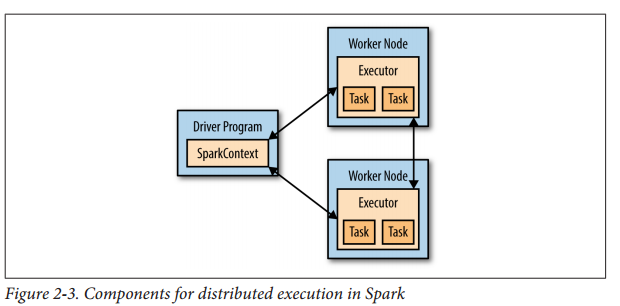

A lot of Spark’s API revolves around **passing functions to its operators** to run them on the cluster. 
Extend our README example by *filtering* the lines in the file that contain a word, such as Python:

In [ ]:
>>> lines = sc.textFile("README.md")
>>> pythonLines = lines.filter(lambda line: "Python" in line)
>>> pythonLines.first()
u'## Interactive Python Shell'

In [ ]:
scala> val lines = sc.textFile("README.md") // Create an RDD called lines
lines: spark.RDD[String] = MappedRDD[...]
scala> val pythonLines = lines.filter(line => line.contains("Python"))
pythonLines: spark.RDD[String] = FilteredRDD[...]
scala> pythonLines.first()
res0: String = ## Interactive Python Shell

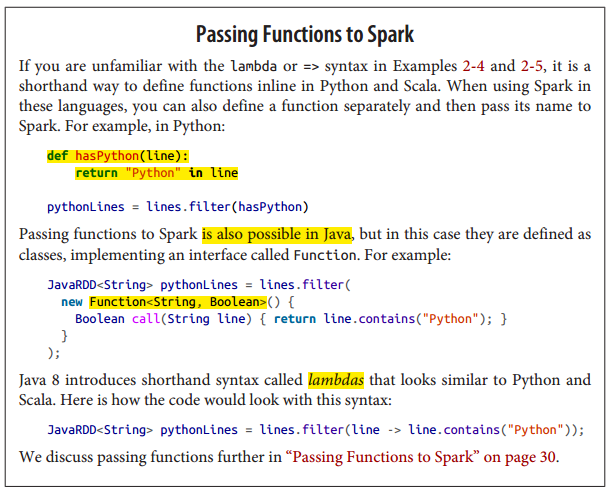

A lot of its magic is that *function-based operations* like `filter` also **parallelize across the cluster**.

That is, Spark automatically takes your function (e.g., line.contains("Python")) and ships it to *executor nodes*. Thus, you can write code in a single driver program and automatically have parts of it run on multiple nodes.

### Standalone Applications

Apart from running *interactively*, Spark can be linked into standalone applications in either Java, Scala, or Python. 
The main difference from using it in the shell is that **you need to initialize your own `SparkContext`**. After that, the API is the same.

The process of linking to Spark varies by language:
* In Java and Scala, you give your application a Maven dependency on the `spark-core` artifact. 

The Maven coordinates for that are:

`groupId = org.apache.spark
artifactId = spark-core_2.10
version = 1.2.0`

You can use Maven itself to build your project, or use other tools that can talk to the Maven repositories, including Scala’s **sbt** tool or **Gradle**. Popular integrated development environments like Eclipse also allow you to directly add a Maven dependency to a project.

* In Python, you simply write applications as Python scripts, but you must run them using the `bin/spark-submit` script included in Spark. The `spark-submit` script includes the Spark dependencies for us in Python. This script sets up the environment for Spark’s Python API to function. Simply run your script with the line given:

`bin/spark-submit my_script.py`

### Initializing a SparkContext

Once you have linked an application to Spark: 
* import the Spark packages in your program.
* create a `SparkConf` object to configure your application.
* create a `SparkContext` for it. 

In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName("My App")
sc = SparkContext(conf = conf)

In [ ]:
import org.apache.spark.SparkConf
import org.apache.spark.SparkContext
import org.apache.spark.SparkContext._
val conf = new SparkConf().setMaster("local").setAppName("My App")
val sc = new SparkContext(conf)

In [ ]:
import org.apache.spark.SparkConf;
import org.apache.spark.api.java.JavaSparkContext;
SparkConf conf = new SparkConf().setMaster("local").setAppName("My App");
JavaSparkContext sc = new JavaSparkContext(conf);

You pass two parameters:
• A **cluster URL**, namely `local` in these examples, which tells Spark how to connect
to a cluster. `local` is a special value that runs Spark on **one thread on the local machine**, without connecting to a cluster.
• An **application name**, namely `My App` in these examples. This will identify your
application on the cluster manager’s UI if you connect to a cluster.

After you have initialized a `SparkContext`, you can use all the methods we showed before to create RDDs (e.g., from a text file) and manipulate them.

You can either call the `stop()` method on your `SparkContext`, or simply exit the application (e.g., with `System.exit(0)` or `sys.exit()`).

Refer to the "Quick Start Guide" in the official Spark documentation.

### Building Standalone Applications

# Programming with RDDs

An RDD is simply a distributed collection of elements. 

In Spark all work is expressed as either:

* **creating new RDDs**
* **transforming existing RDDs**
* **calling operations on RDDs to compute a result**. 

Under the hood, Spark automatically **distributes the data contained in RDDs across your cluster and parallelizes the operations you perform** on them.

## RDD Basics

An RDD in Spark is simply an **immutable distributed collection of objects**. 

Each RDD is split into multiple **partitions**, which may be **computed on different nodes of the cluster**. 

RDDs can contain **any type of Python, Java, or Scala objects**, including user defined classes.

Users create RDDs in two ways: 
* by loading an external dataset, (for example, loading a text file as an RDD of strings `lines = sc.textFile("README.md")`) 
* by distributing a collection of objects (e.g., a list or set) in their driver program. 


RDDs offer two types of operations:
* Transformations: construct **a new RDD** from a previous one. For example, filtering data that matches a predicate.

In our text file example, we can use this to create a new RDD holding just the strings that contain the word Python:

`pythonLines = lines.filter(lambda line: "Python" in line)`

* Actions: compute **a result** based on an RDD, and either return it to the *driver program* or *save it to an external storage system* (e.g., HDFS). 

One example of an action we called earlier is `first()`:

`pythonLines.first()`

u'## Interactive Python Shell'

Transformations and actions are different because of the way Spark computes RDDs.

Although you can define new RDDs any time, Spark *computes them only in a **lazy**
fashion*:
that is, **the first time they are used in an *action***. 

This approach might seem unusual at first, but makes a lot of sense when you are working with Big Data. For instance, consider above Examples, where we defined a text file and
then filtered the lines that include Python. 

If Spark were to load and store all the lines in the file as soon as we wrote `lines = sc.textFile(...)`, it would waste a lot of storage space, given that we then immediately filter out many lines. 

Instead, once Spark **sees the whole chain of transformations**, it can compute just the data needed for its result. In fact, for the `first()` action, Spark scans the file **only until it finds the first matching line**; it doesn’t even read the whole file.



تا وفتی که یک action یا تبدیل استفاده نشود، مقدار RDD ارزیابی نمیشود

Spark’s RDDs are by default **recomputed each time you run an action on them**. 

If you would like to **reuse an RDD in multiple actions**, you can ask Spark to **persist** it using `RDD.persist()`. 

We can ask Spark to *persist our data in a number of different places*, which will be covered in Table 3-6. 

After computing it the first time, Spark will store the RDD contents in memory (partitioned across the machines in your cluster), and reuse them in future actions. **Persisting RDDs on disk** instead of memory is also possible. 

The behavior of **not persisting by default** may again seem unusual, but it makes a lot of sense for big datasets: **if you will not reuse the RDD**, there’s no reason to waste storage space when Spark could instead stream through the data once and just compute the result.

In practice, you will often use `persist()` to **load a subset of your data into memory
and query it repeatedly**. For example, if we knew that we wanted to compute multiple
results about the README lines that contain Python, we could write:

In [ ]:
>>> pythonLines.persist
>>> pythonLines.count()
2
>>> pythonLines.first()
u'## Interactive Python Shell'

To summarize, every Spark program and shell session will work as follows:

1. Create some input RDDs from external data.
2. Transform them to define new RDDs using transformations like `filter()`.
3. Ask Spark to `persist()` any intermediate RDDs that **will need to be reused**.
4. Launch actions such as `count()` and `first()` to kick off a parallel computation, which is then optimized and executed by Spark.

`cache()` is the same as calling `persist()` with the default storage level.

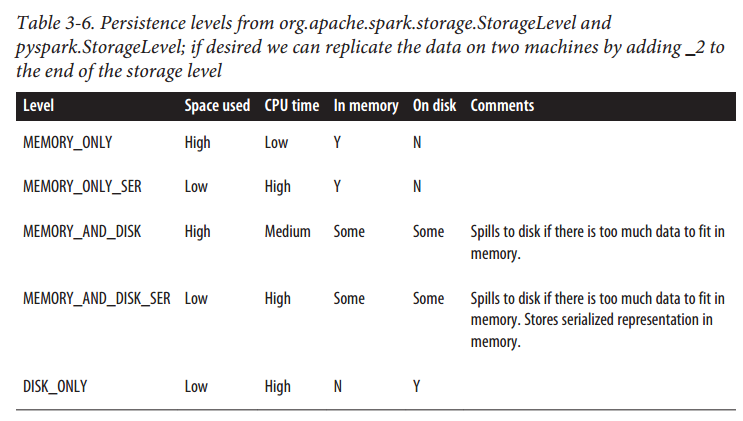

### Creating RDDs

Two ways to create RDDs: 
* loading an external dataset.
* parallelizing a collection in your *driver program*.

The simplest way to create RDDs: 

* Take an *existing collection* in your program and pass it to `SparkContext`’s `parallelize()` method.

In [ ]:
lines = sc.parallelize(["pandas", "i like pandas"])

// Scala
val lines = sc.parallelize(List("pandas", "i like pandas"))

// Java

JavaRDD<String> lines = sc.parallelize(Arrays.asList("pandas", "i like pandas"));

This approach is very useful when you are learning Spark, since you can quickly create your own RDDs in the shell and perform operations on them. Keep in mind, however, that outside of prototyping and testing, this is not widely used since *it requires that you have your entire dataset in memory on one machine*.

A more common way to create RDDs:

* Load data from external storage. 

We already saw one method that loads a text file as an RDD of strings, `SparkContext.textFile()`:

In [ ]:
# Python
lines = sc.textFile("/path/to/README.md")

// Scala
val lines = sc.textFile("/path/to/README.md")

// Java
JavaRDD<String> lines = sc.textFile("/path/to/README.md");

### RDD Operations

Two types of operations: 

* **transformations**: operations on RDDs that *return a new RDD*, such as `map()` and `filter()`
* **actions**: operations that *return a result to the driver program* or *write it to storage*, and kick off a computation, such as `count()` and `first()`.

Spark treats transformations and actions very differently, so understanding which
type of operation you are performing will be important. 

Check whether a given function is a transformation or an action? 

Look at its return type: transformations return RDDs, whereas actions return some other data type.

### Transformations

Transformations are operations on RDDs that return a new RDD. 

Transformed RDDs are **computed lazily**, only when you *use them in an action*. 

Many transformations are **element-wise**: 

they work on one element at a time; but this is not true for all transformations. 
As an example, suppose that we have a logfile, `log.txt`, with a number of messages, and we want to select only the error messages. We can use the `filter()` transformation seen before. 

In [ ]:
inputRDD = sc.textFile("log.txt")
errorsRDD = inputRDD.filter(lambda x: "error" in x)

// Scala
val inputRDD = sc.textFile("log.txt")
val errorsRDD = inputRDD.filter(line => line.contains("error"))

// Java
JavaRDD<String> inputRDD = sc.textFile("log.txt");
JavaRDD<String> errorsRDD = inputRDD.filter(
new Function<String, Boolean>() {
public Boolean call(String x) { return x.contains("error"); }
}
});

Note that the `filter()` operation does not mutate the existing `inputRDD`. 

Instead, it **returns a pointer to an entirely new RDD**. `inputRDD` can still be reused later in the program—for instance, to search for other words. In fact, let’s use `inputRDD` again to
search for lines with the word warning in them. Then, we’ll use another transformation, `union()`, to print out the number of lines that contained either error or warning.

In [ ]:
errorsRDD = inputRDD.filter(lambda x: "error" in x)
warningsRDD = inputRDD.filter(lambda x: "warning" in x)
badLinesRDD = errorsRDD.union(warningsRDD)

`union()` operates on two RDDs instead of one. 

Transformations can actually operate on any number of input RDDs.

A better way to accomplish the same result as in last would be to simply filter the `inputRDD` once, looking for either 'error' or 'warning'.

Finally, as you derive new RDDs from each other using transformations, **Spark keeps track of the set of dependencies between different RDDs**, called the **lineage graph**.

It uses this information to **compute each RDD on demand and to recover lost data if
part of a persistent RDD is lost**.

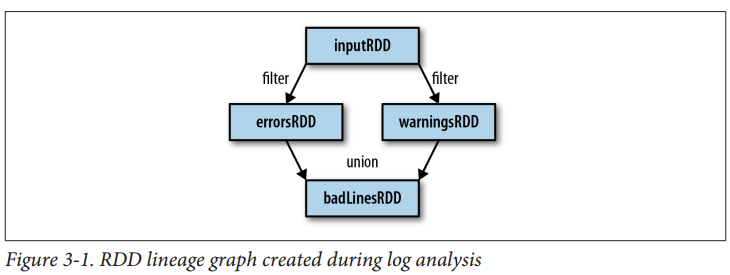

### Actions

Actions are the operations that return a final value to the driver program or write data to an external storage system. 

Actions **force the evaluation of the transformations required for the RDD they were called on**, since they need to *actually produce output*.

Continuing the log example from the previous section, we might want to print out some information about the `badLinesRDD`. 

`count()`: returns the count as a number

`take()`: collects a number of elements from the RDD

In [ ]:
# Python
print "Input had " + badLinesRDD.count() + " concerning lines"
print "Here are 10 examples:"
for line in badLinesRDD.take(10):
    print line
    
// Scala 
println("Input had " + badLinesRDD.count() + " concerning lines")
println("Here are 10 examples:")
badLinesRDD.take(10).foreach(println)

// Java
System.out.println("Input had " + badLinesRDD.count() + " concerning lines")
System.out.println("Here are 10 examples:")
for (String line: badLinesRDD.take(10)) {
    System.out.println(line);
}

In this example: 

* we used `take()` to retrieve a small number of elements in the RDD at the driver program. 

* We then iterate over them locally to print out information at the driver. 


RDDs also have a `collect()` function to **retrieve the entire RDD**. This can
be useful if your program filters RDDs down to a *very small size* and *you’d like to
deal with it locally*: 

***Your entire dataset must fit in memory on a single machine to use `collect()` on it, so `collect()` shouldn’t be used on large datasets.***


In most cases RDDs **can’t just be `collect()`ed** to the driver because they are too large. 

In these cases, it’s common to **write data out to a distributed storage system such as HDFS or Amazon S3**. 

You can save the contents of an RDD using the `saveAsTextFile()` action, `saveAsSequenceFile()`, or any of a number of actions for various built-in formats. 

It is important to note that **each time we call a new action, the entire RDD must be computed “from scratch.”**. To avoid this inefficiency, users can **persist intermediate results**.

### Lazy Evaluation

***Transformations on RDDs are lazily evaluated***:

*Spark will not begin to execute until it sees an **action**.*


Lazy evaluation: 

When we call a transformation on an RDD (for instance, calling `map()`), **the operation is not immediately performed**:

Instead, Spark internally records metadata to indicate that this operation has been requested.

Rather than thinking of an RDD as containing specific data, it is best to **think of each RDD as consisting of instructions on how to compute the data that we build up through
transformations**. 

<hr>
***Loading data into an RDD is lazily evaluated in the same way transformations are.***

When we call `sc.textFile()`, the **data is not loaded until it is necessary**. As with transformations, the operation (in this case, reading the data) can occur multiple times.

Although transformations are lazy, you can **force Spark to execute them at any time by running an action, such as `count()`**. This is an easy way to test out just part of your program.

Spark uses lazy evaluation to **reduce the number of passes it has to take over our data
by grouping operations together**. In systems like Hadoop MapReduce, developers often have to spend a lot of time considering how to group together operations to minimize the number of MapReduce passes. In Spark, there is no substantial benefit to writing a single complex map instead of chaining together many simple operations. Thus, users are free to organize their program into smaller, more manageable operations.

## Passing Functions to Spark

Most of Spark’s transformations, and some of its actions, depend on passing in functions that are used by Spark to compute data. Each of the core languages has a slightly different mechanism for passing functions to Spark:

### Python

Three options for passing functions into Spark.

*  For shorter functions, we can pass in `lambda` expressions:

In [ ]:
word = rdd.filter(lambda s: "error" in s)

* We can pass in top-level functions, or locally defined functions.

In [ ]:
def containsError(s):
    return "error" in s
word = rdd.filter(containsError)

One issue to watch out for when passing functions is inadvertently serializing the object containing the function. 

When you pass **a function that is the member of an object, or contains references to fields in an object** (e.g., self.field), **Spark sends the entire object to worker nodes**, which can be much larger than the bit of information you need (see Example 3-19). Sometimes this can also cause your program to fail, if your class contains objects that Python can’t figure out how to pickle.

In [ ]:
# Passing a function with field references (don’t do this!)
class SearchFunctions(object):
    def __init__(self, query):
        self.query = query
    def isMatch(self, s):
        return self.query in s
    def getMatchesFunctionReference(self, rdd):
        # Problem: references all of "self" in "self.isMatch"
        return rdd.filter(self.isMatch)
    def getMatchesMemberReference(self, rdd):
        # Problem: references all of "self" in "self.query"
        return rdd.filter(lambda x: self.query in x)

Instead, just **extract the fields you need from your object into a local variable** and pass
that in

In [ ]:
# Python function passing without field references
class WordFunctions(object):
    # ...
    def getMatchesNoReference(self, rdd):
    # Safe: extract only the field we need into a local variable
        query = self.query
        return rdd.filter(lambda x: query in x)

### Scala

We can pass in 

* functions defined inline 
* references to methods 
* static functions as we do for Scala’s other functional APIs. 

Some other considerations come into play, though—namely that the function we pass and the data referenced in it **needs to be serializable** (implementing Java’s Serializable interface). 

Furthermore, as in Python, passing a method or field of an object includes a reference to that whole object, though this is less obvious because we are not forced to write these references
with self. 

As we did with Python, we can instead *extract the fields we need as local variables and avoid needing to pass the whole object containing them*.

In [ ]:
//Scala function passing

class SearchFunctions(val query: String) {
    def isMatch(s: String): Boolean = {
        s.contains(query)
    }
    def getMatchesFunctionReference(rdd: RDD[String]): RDD[String] = {
        // Problem: "isMatch" means "this.isMatch", so we pass all of "this"
        rdd.map(isMatch)
    }
    def getMatchesFieldReference(rdd: RDD[String]): RDD[String] = {
        // Problem: "query" means "this.query", so we pass all of "this"
        rdd.map(x => x.split(query))
    }
    def getMatchesNoReference(rdd: RDD[String]): RDD[String] = {
        // Safe: extract just the field we need into a local variable
        val query_ = this.query
        rdd.map(x => x.split(query_))
    }
}

If `NotSerializableException` occurs in Scala, a reference to a method or field in a nonserializable class is usually the problem. Note that passing in local serializable variables or functions that are members of a top-level object is always safe.

### Java

In Java, functions are specified as **objects that implement one of Spark’s function interfaces** from the `org.apache.spark.api.java.function` package. There are a number of different interfaces *based on the return type* of the function. 


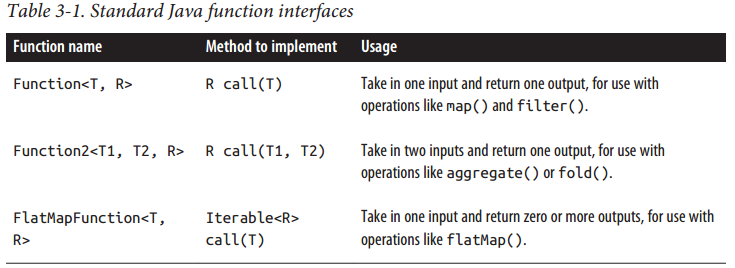

We can either define our:
* **function classes inline as anonymous inner classes**. 
* create a named class.

In [ ]:
// Java function passing with anonymous inner class

RDD<String> errors = lines.filter(new Function<String, Boolean>() {
public Boolean call(String x) { return x.contains("error"); }
})

In [ ]:
// Java function passing with named class

class ContainsError implements Function<String, Boolean>() {
public Boolean call(String x) { return x.contains("error"); }
}

RDD<String> errors = lines.filter(new ContainsError());

One other benefit of top-level functions is that you can give them **constructor parameters**:

In [ ]:
//Java function class with parameters

class Contains implements Function<String, Boolean>() {
    private String query;
    public Contains(String query) { this.query = query; }
    public Boolean call(String x) { return x.contains(query); }
}
RDD<String> errors = lines.filter(new Contains("error"));

In Java 8, you can also use **lambda expressions** to concisely implement the function interfaces. However, with lambda expressions, our search example would look like:

In [ ]:
//Java function passing with lambda expression in Java 8

RDD<String> errors = lines.filter(s -> s.contains("error"));

Both anonymous inner classes and lambda expressions can reference any `final` variables in the method enclosing them, so you can pass these variables to Spark just as in Python and Scala.

#### Common Transformations and Actions

* Common transformations and actions in Spark (transformations and actions we can perform on all RDDs regardless of the data.).

* Additional operations on RDDs containing *certain types* of data—for example, statistical functions on RDDs of numbers, and key/value operations such as aggregating data by key on RDDs of key/value pairs. 

#### Basic RDDs (transformations and actions on all RDDs regardless of the data.)

#### Element-wise transformations

The `map()` transformation takes in a function and **applies it to each element** in the RDD with the result of the function being the new value of each element in the resulting RDD. 

The `filter()` transformation takes in a function and returns an RDD that only has elements that pass the `filter()` function.

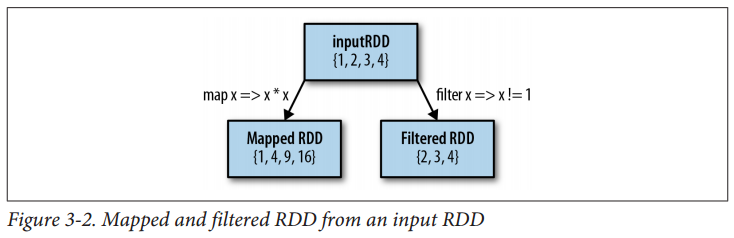

It is useful to note that `map()`’s return type **does not have to be the same as its input type**, so if we had an RDD String and our `map()` function were to parse the strings and return a Double, our input RDD type would be `RDD[String]` and the resulting RDD type would be
`RDD[Double]`.

##### example of `map()` that squares all of the numbers in an RDD

In [ ]:
# Python
nums = sc.parallelize([1, 2, 3, 4])

squared = nums.map(lambda x: x * x).collect()

for num in squared:
    print ("%i " % (num))
    
    
// Scala

val input = sc.parallelize(List(1, 2, 3, 4))
val result = input.map(x => x * x)
println(result.collect().mkString(","))

// Java

JavaRDD<Integer> rdd = sc.parallelize(Arrays.asList(1, 2, 3, 4));
JavaRDD<Integer> result = rdd.map(new Function<Integer, Integer>() {
public Integer call(Integer x) { return x*x; }
});
System.out.println(StringUtils.join(result.collect(), ","));

`flatMap()`:
Produce **multiple output elements for each input element**. 

As with `map()`, the function we provide to `flatMap()` is called individually for each element in our input RDD.  

Instead of returning a single element, we **return an iterator with our return values**. Rather than producing **an RDD of iterators**, we get back **an RDD that consists of the elements from all of the iterators**.

You can think of `flatMap()` as **“flattening” the iterators returned to it**, so that instead of ending up with an RDD of lists we have an RDD of the elements in those lists.



In [ ]:
lines = sc.parallelize(["hello world", "hi"])
words = lines.flatMap(lambda line: line.split(" "))
words.first() # returns "hello"

//Scala, splitting lines into multiple words
val lines = sc.parallelize(List("hello world", "hi"))
val words = lines.flatMap(line => line.split(" "))
words.first() // returns "hello"


//Java, splitting lines into multiple words
JavaRDD<String> lines = sc.parallelize(Arrays.asList("hello world", "hi"));
JavaRDD<String> words = lines.flatMap(new FlatMapFunction<String, String>() {
public Iterable<String> call(String line) {
return Arrays.asList(line.split(" "));
}
});
words.first(); // returns "hello"

A simple usage of `flatMap()` is splitting up an input string into words, as shown in

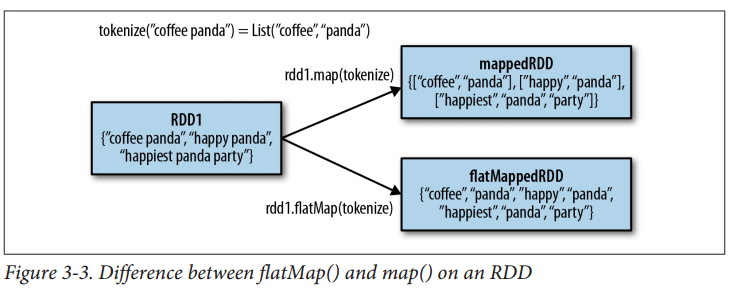

##### Pseudo set operations

RDDs support many of the operations of mathematical sets, such as union and intersection, *even when the RDDs themselves are not properly sets*. 

It’s important to note that all of these operations require that the **RDDs being operated on are of the same type**.

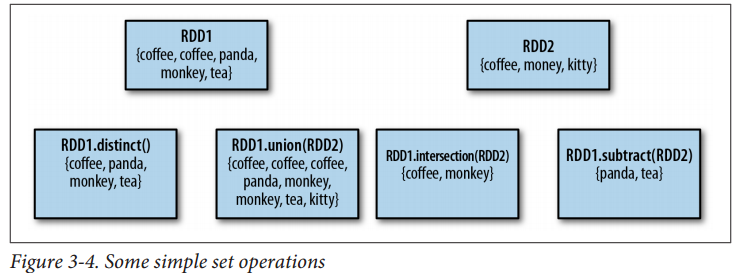

* If we want only unique elements we can use the `RDD.distinct()` transformation to produce a new RDD with only distinct items. `distinct()` is expensive, however, as it requires shuffling all the data over the network to ensure that we receive only one copy of each element. Shuffling, and how to avoid it will be discussed later.

* `union(other)` gives back an RDD consisting of the data from both sources. This can be useful in a number of use cases, such as processing *logfiles* from many sources. Unlike the mathematical `union()`, **if there are duplicates in the input RDDs, the result of Spark’s `union()` will contain duplicates** (which we can fix if desired with `distinct()`).

* `intersection(other)` method, which returns only elements in both RDDs. `intersection()` also removes all duplicates (including duplicates from a single RDD) while running. While `intersection()` and `union()` are two similar concepts, the performance of `intersection()` is much worse since it requires a shuffle over the network to identify common elements.

* The `subtract(other)` function takes in another RDD and returns an RDD that has only values present in the first RDD and not the second RDD. Like `intersection()`, it performs a shuffle.

* The `cartesian(other)` transformation returns all possible pairs of (a,b) where a is in the source RDD and b is in the other RDD. The Cartesian product can be useful when we wish to consider the **similarity between all possible pairs**, such as computing every user’s expected interest in each offer. We can also take the **Cartesian product of an RDD with itself**, which can be useful for tasks like user similarity. Cartesian product is **very expensive for large RDDs**.

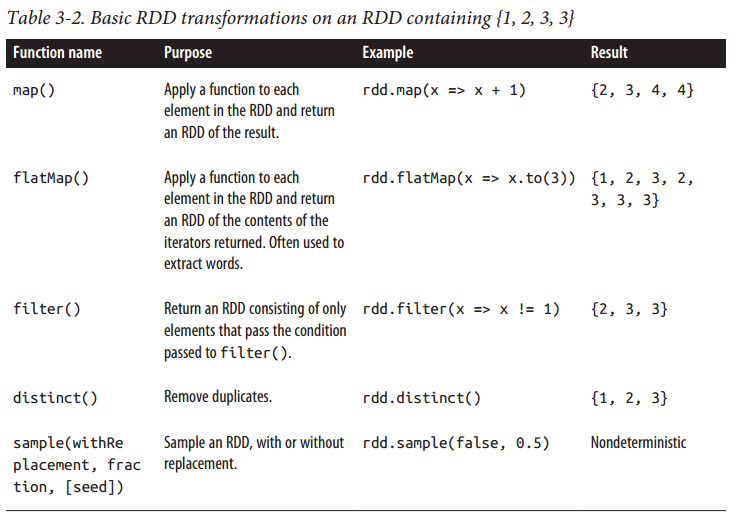

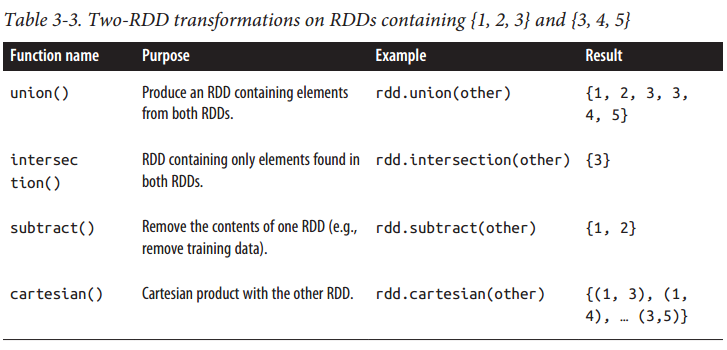

### Actions

`reduce()` takes a function that operates on two elements of the type in your RDD and returns a new element of the same type. 

With `reduce()`, we can easily sum the elements of our RDD, count the number of elements, and perform other types of **aggregations**.

In [ ]:
# reduce() in Python
sum = rdd.reduce(lambda x, y: x + y)

// reduce() in Scala
val sum = rdd.reduce((x, y) => x + y)

//reduce() in Java
Integer sum = rdd.reduce(new Function2<Integer, Integer, Integer>() {
public Integer call(Integer x, Integer y) { return x + y; }
});

Similar to `reduce()` is `fold()`, which also takes a function with the same signature as
needed for `reduce()`, but in addition **takes a “zero value” to be used for the initial call
on each partition**. 


The zero value you provide **should be the identity element** for your operation; that is, applying it multiple times with your function should not change the value (e.g., 0 for +, 1 for \*, or an empty list for concatenation).

You can minimize object creation in `fold()` by modifying and returning the first of the two parameters in place. However, you should not modify the second parameter.

Both `fold()` and `reduce()` require that the return type of our result be the **same type
as that of the elements** in the RDD we are operating over. 

This works well for operations like `sum`, but sometimes we want to **return a different type**: 

For example, when computing a **running average**, we need to keep track of both 
* the count so far 
* the number of elements

which requires us to **return a pair**. 

We could work around this by first using `map()` where we transform every element into the element and the number 1, which is the type we want to return, so that the `reduce()` function can **work on pairs**.

The `aggregate()` function frees us from the constraint of **having the return be the same type as the RDD we are working on**. 

We supply:

* An **initial zero value** of the type we want to return with `aggregate()`, like `fold()`. 
* We then supply a function to **combine the elements from our RDD** with the accumulator. 
* We need to supply a second function to **merge two accumulators**, given that each node accumulates its own results locally.

We can use `aggregate()` to compute the average of an RDD, avoiding a `map()` before the `fold()`

In [2]:
# aggregate() in Python

sumCount = nums.aggregate((0, 0),
(lambda acc, value: (acc[0] + value, acc[1] + 1),
(lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]))))

return sumCount[0] / float(sumCount[1])


// aggregate() in Scala
val result = input.aggregate((0, 0))(
(acc, value) => (acc._1 + value, acc._2 + 1),
(acc1, acc2) => (acc1._1 + acc2._1, acc1._2 + acc2._2))
val avg = result._1 / result._2.toDouble

// aggregate() in Java
class AvgCount implements Serializable {
    public AvgCount(int total, int num) {
        this.total = total;
        this.num = num;
    }

    public int total;
    public int num;

    public double avg() {
        return total / (double) num;
    }
}

Function2<AvgCount, Integer, AvgCount> addAndCount =
        new Function2<AvgCount, Integer, AvgCount>() {
            public AvgCount call(AvgCount a, Integer x) {
                a.total += x;
                a.num += 1;
                return a;
            }
        };

Function2<AvgCount, AvgCount, AvgCount> combine =
        new Function2<AvgCount, AvgCount, AvgCount>() {
            public AvgCount call(AvgCount a, AvgCount b) {
                a.total += b.total;
                a.num += b.num;
                return a;
            }
        };

AvgCount initial = new AvgCount(0, 0);
AvgCount result = rdd.aggregate(initial, addAndCount, combine);
System.out.println(result.avg());

SyntaxError: invalid syntax (<ipython-input-2-4cf311e17f42>, line 10)

Some *actions* on RDDs **return some or all of the data** to our **driver program** in the
form of a **regular collection** or **value**.

The simplest and most common operation `collect()`: 

* returns the entire RDD’s contents. 

* `collect()` is commonly used in *unit tests* where the entire **contents of the RDD are expected to fit in memory**, as that makes it easy to compare the value of our RDD with our expected result. 

* `collect()` suffers from the restriction that *all of your data must fit on a single machine, as it all needs to be copied to the driver*.


`take(n)` returns n elements from the RDD and attempts to minimize the number of partitions it accesses, so it may represent a biased collection. 

It’s important to note that these operations **do not return the elements in the order you might expect**.

These operations are *useful for unit tests and quick debugging*, but may **introduce bottlenecks** when you’re dealing with large amounts of data. 

If there is an **ordering defined on data**: extract the top elements from an RDD using `top()`. `top()` will use the **default ordering** on the data, but we can supply our own **comparison function** to extract the top elements.

Sometimes we need **a sample of our data in our driver program**. The `takeSample(withReplacement, num, seed)` function allows us to take a sample of our data
either with or without replacement.


Sometimes it is useful to perform an action on all of the elements in the RDD, but **without returning any result to the driver program**. A good example of this would be posting JSON to a webserver or inserting records into a database. 

In either case, the **`foreach()` action** lets us perform computations on each element in the RDD *without bringing it back locally*.

`count()` returns a count of the elements

`countByValue()` returns a map of each unique value to its count.

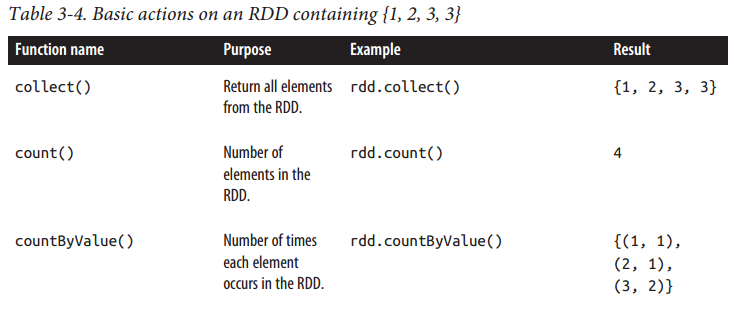

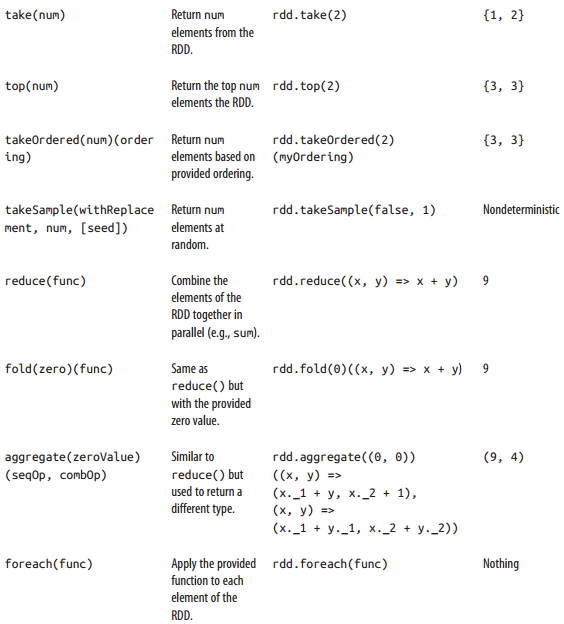

### Converting Between RDD Types

Some functions are available only on certain types of RDDs:

* `mean()` and `variance()` on numeric RDDs 
* `join()` on key/value pair RDDs. 

In Scala and Java, these methods aren’t defined on the standard RDD class, so to access this
additional functionality we have to make sure we get the correct specialized class.

#### Scala

In Scala the conversion to RDDs with special functions (e.g., to expose numeric functions on an RDD[Double]) is **handled automatically** using **implicit conversions**. 

We need to add import `org.apache.spark.SparkContext._` for these conversions to work.

You can see the implicit conversions listed in the `SparkContext` object’s *ScalaDoc*. 

These implicits turn an RDD into various wrapper classes, such as `DoubleRDDFunctions` (for RDDs of numeric data) and `PairRDDFunctions` (for key/value pairs), to expose additional
functions such as `mean()` and `variance()`.

Implicits, while quite powerful, can sometimes be confusing. If you call a function like `mean()` on an RDD, you might look at the Scaladocs for the RDD class and notice there is no `mean()` function. 

The call manages to succeed because of implicit conversions between RDD[Double] and `DoubleRDDFunctions`. When searching for functions on your RDD in Scaladoc, make sure to look at functions that are available in these wrapper classes.

#### Java

In Java the conversion between the specialized types of RDDs is a bit more explicit. In particular, there are special classes called `JavaDoubleRDD` and `JavaPairRDD` for RDDs of these types, with extra methods for these types of data. 


To construct RDDs of these special types, instead of always using the `Function` class we will need to use specialized versions. 

If we want to create a `DoubleRDD` from an RDD of type `T`, rather than using `Function<T, Double>` we use `DoubleFunction<T>`.

We also need to call different functions on our RDD (so we can’t just create a `DoubleFunction` and pass it to `map()`). When we want a `DoubleRDD` back, instead of calling `map()`, we need to call `mapToDouble()` with the same pattern all of the other functions follow.

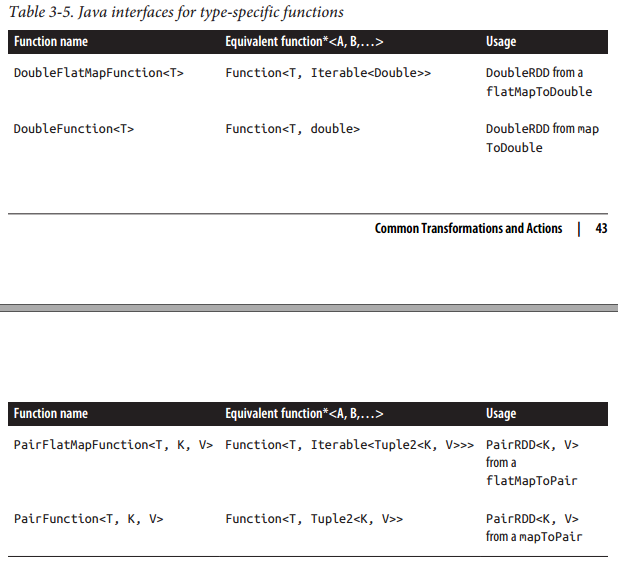

We can modify Example 3-28, where we squared an RDD of numbers, to produce a `JavaDoubleRDD`, as shown in Example 3-38. This gives us access to the additional `DoubleRDD` specific functions like `mean()` and `variance()`.

In [1]:
JavaDoubleRDD result = rdd.mapToDouble(
new DoubleFunction<Integer>() {
public double call(Integer x) {
return (double) x * x;
}
});
System.out.println(result.mean());

SyntaxError: invalid syntax (<ipython-input-1-7b8a82fecdd6>, line 1)

#### Python

The Python API is structured differently than Java and Scala. In Python all of the functions are implemented on the base RDD class but will fail at runtime if the type of data in the RDD is incorrect.

## Persistence (Caching)

Spark RDDs are lazily evaluated, and sometimes we may wish to **use the same RDD multiple times**. 

If we do this naively, **Spark will recompute the RDD and all of its dependencies each time we call an action on the RDD**. This can be especially expensive for iterative algorithms, which look at the data many times. Another trivial example would be doing a count and then writing out the same RDD.

In [2]:
// Double execution in Scala
val result = input.map(x => x*x)
println(result.count())
println(result.collect().mkString(","))

SyntaxError: invalid syntax (<ipython-input-2-7b17e7f2e49b>, line 1)

To avoid computing an RDD multiple times, we can ask Spark to **persist** the data.

When we ask Spark to persist an RDD, the nodes that compute the RDD **store their partitions**.

If a node that has data persisted on it fails, Spark will **recompute the lost partitions** of the data when needed. We can also replicate our data on multiple nodes if we want to be able to handle node failure without slowdown.

Spark has many levels of persistence to choose from based on what our goals are. 

The default `persist()` will store the data in the JVM heap as unserialized objects. In Python, we always serialize the data that persist stores, so the default is instead stored in the JVM heap as pickled objects. When we write data out to disk or off-heap storage, that data is also always serialized.

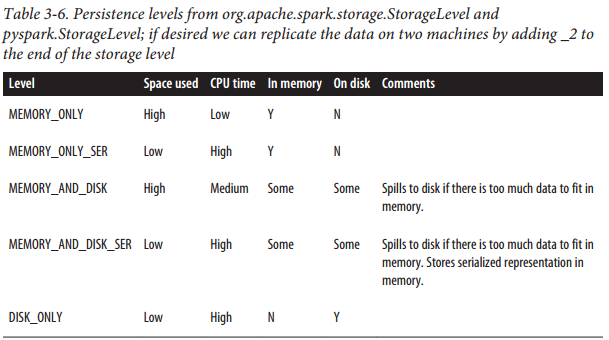

In [3]:
// persist() in Scala
val result = input.map(x => x * x)
result.persist(StorageLevel.DISK_ONLY)
println(result.count())
println(result.collect().mkString(","))

SyntaxError: invalid syntax (<ipython-input-3-6445c2eb598b>, line 1)

Call `persist()` on the RDD before the first action. 
The persist() call on its own doesn’t force evaluation

If you attempt to cache too much data to fit in memory, Spark will automatically evict old partitions using a *Least Recently Used (LRU)* cache policy. 

For the memory only storage levels, it will recompute these partitions the next time they are accessed, while for the memory-and-disk ones, it will write them out to disk. 

In either case, this means that you don’t have to worry about your job breaking if you ask Spark to cache too much data. However, caching unnecessary data can lead to eviction of useful data and more recomputation time.

RDDs come with a method called `unpersist()` that lets you **manually remove them from the cache**.